# Introduction to SageMath

## Where are we?

This is a [Jupyter](https://jupyter.org/) notebook for SageMath. 

Jupyter provides a system to mix text and code in a worksheet. It can work with different "kernels", SageMath is one possible kernel

The next cell is a code cell, you can execute it by typing Shift+Enter

In [1]:
6*7

42

## Some python

SageMath is coded in python, so cells can actually contain elaborate python code

[Project Euler problem number 1](https://projecteuler.net/problem=1)

*If we list all the natural numbers below $10$ that are multiples of $3$ or $5$, we get $3, 5, 6$ and $9$. The sum of these multiples is $23$. Find the sum of all the multiples of $3$ or $5$ below $1000$*

In [2]:
sum(i for i in range(1000) if i%3 == 0 or i%5 == 0)

233168

[Project Euler problem number 2](https://projecteuler.net/problem=2)

*Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with $1$ and $2$, the first $10$ terms will be:*
$$1, 2, 3, 5, 8, 13, 21, 34, 55, 89, \dots$$
*By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.*

In [3]:
def fibo(n):
    f1 = 0
    f2 = 1
    while f2 <n:
        yield f2
        f1, f2 = f2, f1+f2

In [4]:
sum(v for v in fibo(4000000) if v%2 == 0)

4613732

Viviane's problem:

*Generate all words $w$ on $\mathbb{N}$ of length $n$ starting with zero such that $0 \leq w_{i+1} \leq w_i + 1$*

In [5]:
def my_words(n):
    if n == 0:
        yield tuple()
    elif n == 1:
        yield (0,)
    else:
        for w in my_words(n-1):
            for i in range(w[-1]+2):
                yield w + (i,)

In [6]:
list(my_words(3))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (0, 1, 2)]

In [7]:
[len(list(my_words(n))) for n in range(10)]

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

## Some maths

But Sage contains a bunch of mathematical stuff and librairies and can do most of "classical math" and calculus computation

In [8]:
f(x) = x^2*sin(x) + (x-1)*cos(x)^2

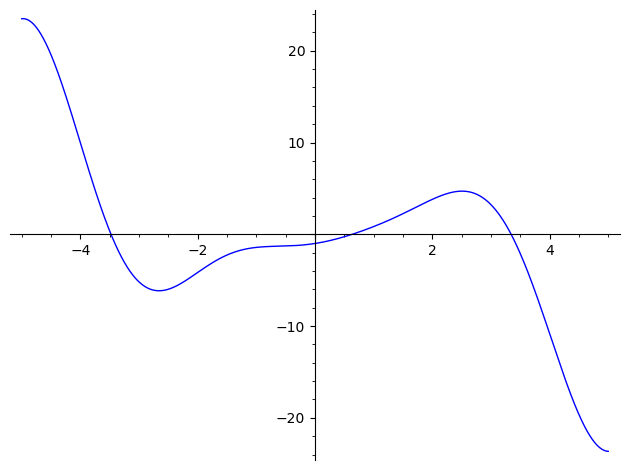

In [9]:
f.plot(xmin = -5, xmax=5)

In [10]:
g = f.derivative()(2)*(x-2) + f(2)

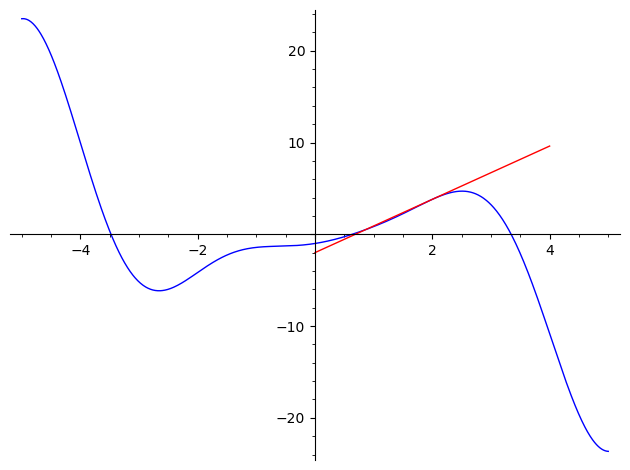

In [11]:
f.plot(xmin = -5, xmax=5) + g.plot(xmin = 0, xmax = 4, color = "red")

In [12]:
solve(x^2 + 3*x + 2, x)

[x == -2, x == -1]

In [13]:
t = var('t')    
x = function('x')(t)
DE = diff(x, t) + x - 1
desolve(DE, [x,t])

(_C + e^t)*e^(-t)

Note that Sage adds some extra math syntax on top of python (when using the notebook or the sage terminal)

In [14]:
2^3 # means 2 to the power of 3 (2**3 in python)

8

In [15]:
a = 2 # not a python int
type(a)

<class 'sage.rings.integer.Integer'>

In [16]:
a.is_prime()

True

## Many objects from combinatorics

In [19]:
list(BinaryTrees(3))

[[., [., [., .]]],
 [., [[., .], .]],
 [[., .], [., .]],
 [[., [., .]], .],
 [[[., .], .], .]]

In [21]:
[bt.to_dyck_word() for bt in BinaryTrees(3)]

[[1, 0, 1, 0, 1, 0],
 [1, 0, 1, 1, 0, 0],
 [1, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0],
 [1, 1, 1, 0, 0, 0]]

## Basics: finding and getting help

Many objects are imported by default. If you start typing their name and use the TAB key, it might autocomplete

In [15]:
BinaryTr

NameError: name 'DyckW' is not defined

Not *all objets* are imported, sometimes, you need to do a manual import. You can browse the [documentation](https://doc.sagemath.org/) to see if you find what you're looking for.

To know how to create a specific object or use a certain function / method, you can use the "?" sign

In [22]:
BinaryTree?

Init signature: BinaryTree(cls, *args, **kwds)
Docstring:     
   Binary trees.

   Binary trees here mean ordered (a.k.a. plane) finite binary trees,
   where "ordered" means that the children of each node are ordered.

   Binary trees contain nodes and leaves, where each node has two
   children while each leaf has no children. The number of leaves of a
   binary tree always equals the number of nodes plus 1.

   INPUT:

   * "children" -- "None" (default) or a list, tuple or iterable of
     length 2 of binary trees or convertible objects. This corresponds
     to the standard recursive definition of a binary tree as either a
     leaf or a pair of binary trees. Syntactic sugar allows leaving
     out all but the outermost calls of the "BinaryTree()"
     constructor, so that, e. g.,
     "BinaryTree([BinaryTree(None),BinaryTree(None)])" can be
     shortened to "BinaryTree([None,None])". It is also allowed to
     abbreviate "[None, None]" by "[]".

   * "check" -- boolean (default

In [23]:
bt = BinaryTree([None, BinaryTree([None, None])])

In [24]:
bt

[., [., .]]

In [ ]:
bt.

Once you have an object, you can use "." + the TAB key to see *all the methods* you can use on it

In [25]:
bt.to_dyck_word?

Signature:      bt.to_dyck_word(self, usemap='1L0R')
Docstring:     
   Return the Dyck word associated with "self" using the given map.

   INPUT:

   * "usemap" -- string; either "'1L0R'", "'1R0L'", "'L1R0'", "'R1L0'"

   The bijection is defined recursively as follows:

   * a leaf is associated to the empty Dyck Word

   * a tree with children l,r is associated with the Dyck word
     described by "usemap" where L and R are respectively the Dyck
     words associated with the trees l and r.

   EXAMPLES:

      sage: BinaryTree().to_dyck_word()
      []
      sage: BinaryTree([]).to_dyck_word()
      [1, 0]
      sage: BinaryTree([[[], [[], None]], [[], []]]).to_dyck_word()
      [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]
      sage: BinaryTree([[None,[]],None]).to_dyck_word()
      [1, 1, 0, 1, 0, 0]
      sage: BinaryTree([[None,[]],None]).to_dyck_word("1R0L")
      [1, 0, 1, 1, 0, 0]
      sage: BinaryTree([[None,[]],None]).to_dyck_word("L1R0")
      [1, 1, 0, 0, 1, 0]
   

If you use "??", you get the source code of the method

In [26]:
bt.to_dyck_word??

Signature: bt.to_dyck_word(self, usemap='1L0R')
Docstring:
   Return the Dyck word associated with "self" using the given map.

   INPUT:

   * "usemap" -- string; either "'1L0R'", "'1R0L'", "'L1R0'", "'R1L0'"

   The bijection is defined recursively as follows:

   * a leaf is associated to the empty Dyck Word

   * a tree with children l,r is associated with the Dyck word
     described by "usemap" where L and R are respectively the Dyck
     words associated with the trees l and r.

   EXAMPLES:

      sage: BinaryTree().to_dyck_word()
      []
      sage: BinaryTree([]).to_dyck_word()
      [1, 0]
      sage: BinaryTree([[[], [[], None]], [[], []]]).to_dyck_word()
      [1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0]
      sage: BinaryTree([[None,[]],None]).to_dyck_word()
      [1, 1, 0, 1, 0, 0]
      sage: BinaryTree([[None,[]],None]).to_dyck_word("1R0L")
      [1, 0, 1, 1, 0, 0]
      sage: BinaryTree([[None,[]],None]).to_dyck_word("L1R0")
      [1, 1, 0, 0, 1, 0]
      sage: B

In [32]:
dw._area_sequence_iter??

Signature: dw._area_sequence_iter() -> 'Iterator[int]'
Docstring:
   Return an iterator producing the area sequence.

   See also: "to_area_sequence()"

   EXAMPLES:

      sage: d = DyckWord([1, 0, 1, 0])
      sage: [a for a in d._area_sequence_iter()]
      [0, 0]
Source:   
    def _area_sequence_iter(self) -> Iterator[int]:
        """
        Return an iterator producing the area sequence.

        .. SEEALSO:: :meth:`to_area_sequence`

        EXAMPLES::

            sage: d = DyckWord([1, 0, 1, 0])
            sage: [a for a in d._area_sequence_iter()]
            [0, 0]
        """
        a = 0
        for move in self:
            if move == open_symbol:
                yield a
                a += 1
            else:
                a -= 1
File:      ~/miniconda3/envs/jupyter-sage/lib/python3.11/site-packages/sage/combinat/dyck_word.py
Type:      method